# Plot Depth Profile from 1D model

This notebook will be able to plot the depth profile underneath a certain station within the 3D resistivity model

In [1]:
# =============================================================================
# Imports
# =============================================================================
import numpy as np
from mtpy import MTData
from mtpy.modeling import StructuredGrid3D

from matplotlib import pyplot as plt
%matplotlib widget
# =============================================================================

In [2]:
d = MTData()
d.from_modem(
    r"c:\Users\jpeacock\OneDrive - DOI\SAGE\modem_inv\VC_2024_ZT_resp_cull.dat"
)
d._center_lat = 0
d._center_lon = 0
d.utm_crs = 32613

s = StructuredGrid3D()
s.from_modem(
    r"c:\Users\jpeacock\OneDrive - DOI\SAGE\modem_inv\VC_2024_ZT_NLCG_111.rho"
)
s.station_locations = d.station_locations
s.center_point = d.center_point

In [4]:
print(s.station_locations.station.unique())

['23004' '23006' '23009' '23020' '23022' '23023' '23029' '23101' '23102'
 '23104' '23105' '23106' '23107' '23108' '23109' 'S1901' 'S1902' 'S1903'
 'S1904' 'S1905' 'S1906' 'S2201' 'S9111' 'S9112' 'S9113' 'S9114' 'S9215'
 'S9216' 'S92C1' 'S92C2' 'UC001' 'UC002' 'UC003' 'UC006' 'UC008' 'UC010'
 'UC012' 'UC013' 'UC014' 'UC015' 'UC017' 'UC019' 'UC021' 'UC022' 'UC024'
 'UC025' 'UC026' 'UC027' 'UC028' 'UC029' 'UC030' 'UC031' 'UC111' 'V2401'
 'V2402' 'V2403' 'V2404' 'V2405' 'V2406' 'V2409' 'bnd04' 'bnd05' 'bnd06'
 'bnd07' 'bnd09']


In [5]:
# pick station
station = "V2406"

if station not in s.station_locations.station.unique():
    raise ValueError(f"{station} not found.")

sdf = s.station_locations[s.station_locations.station == station]

In [6]:
east_index = np.where((s.grid_east <= float(sdf.model_east)))[0][-1]
north_index = np.where((s.grid_north <= float(sdf.model_north)))[0][-1]

res_1d = s.res_model[north_index, east_index, :]
res_1d[np.where(res_1d > 10000)] = np.nan

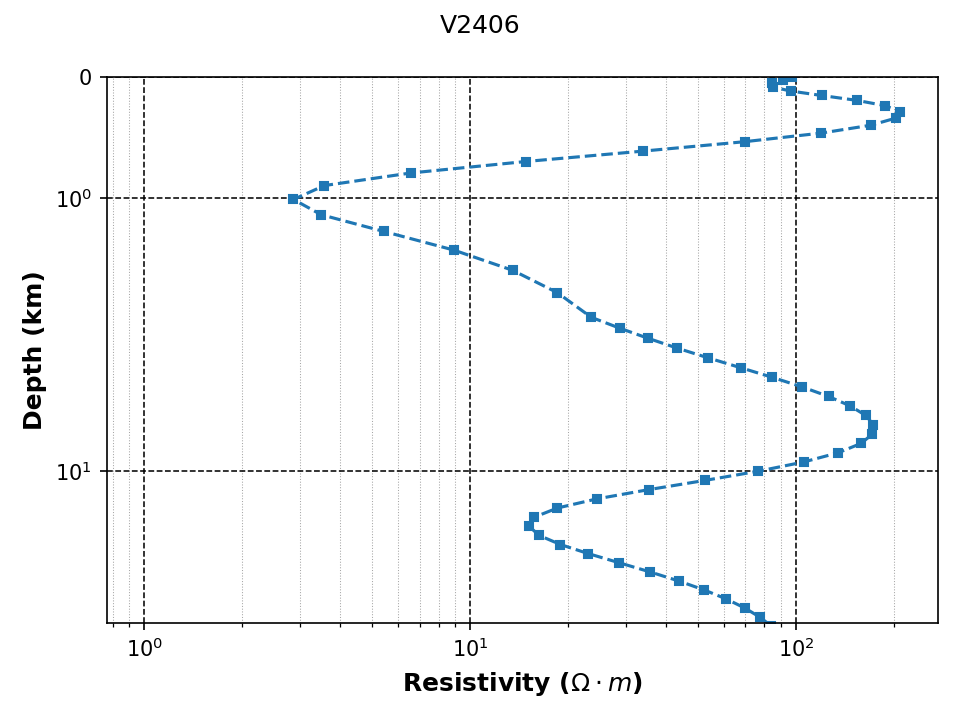

In [7]:
fig = plt.figure(3, dpi=150)

ax = fig.add_subplot(1, 1, 1)
ax.plot(res_1d, s.grid_z[0:-1] / 1000, ls="--", marker="s", ms=4)
ax.set_xscale("log")
ax.set_yscale("symlog")

ax.set_xlabel("Resistivity ($\Omega \cdot m$)",
              fontdict={"size": 12, "weight": "bold"})
ax.set_ylabel("Depth (km)",fontdict={"size": 12, "weight": "bold"})

ax.set_ylim(50, 0)
ax.grid(which="major", color="k", lw=0.75, ls="--")
ax.grid(which="minor", color=(0.65, 0.65, 0.65), lw=0.5, ls=":")
fig.suptitle(station, fontdict={"size": 14, "weight": "bold"})
fig.tight_layout()

plt.show()